In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from IPython.display import Image

# 5.1

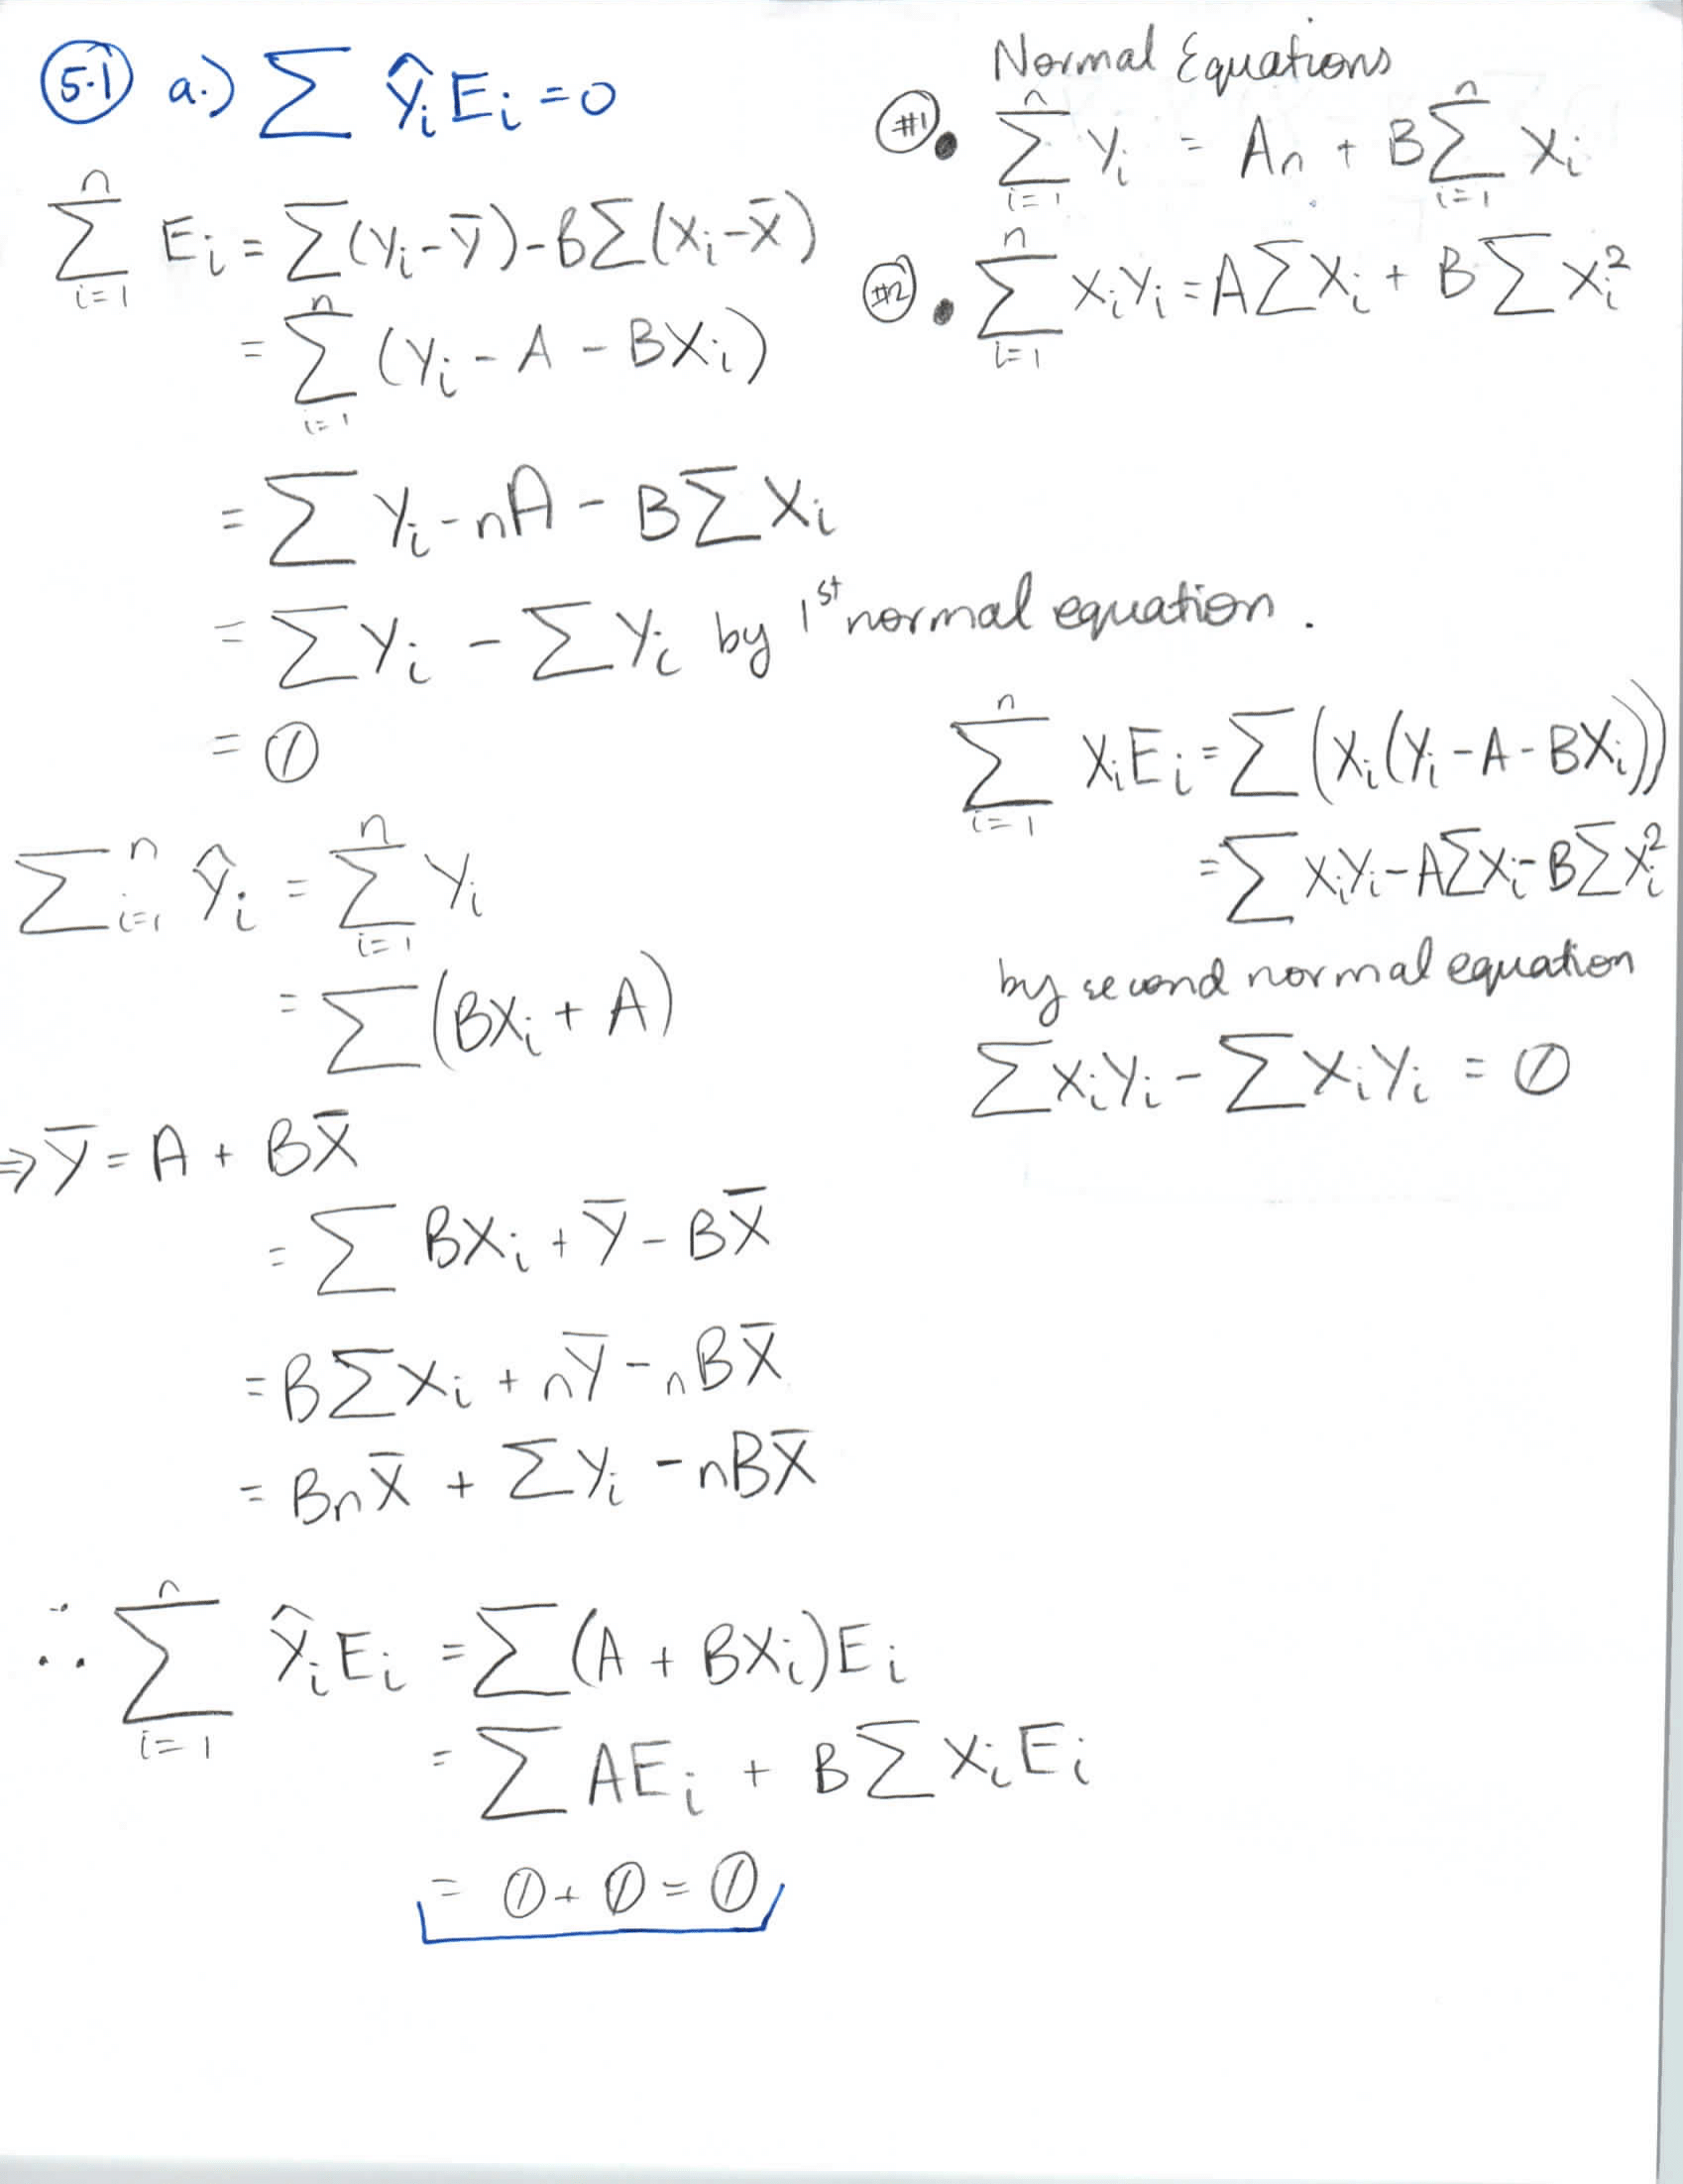

In [2]:
Image("hw2_5.1-1.png",width=500, height=650)


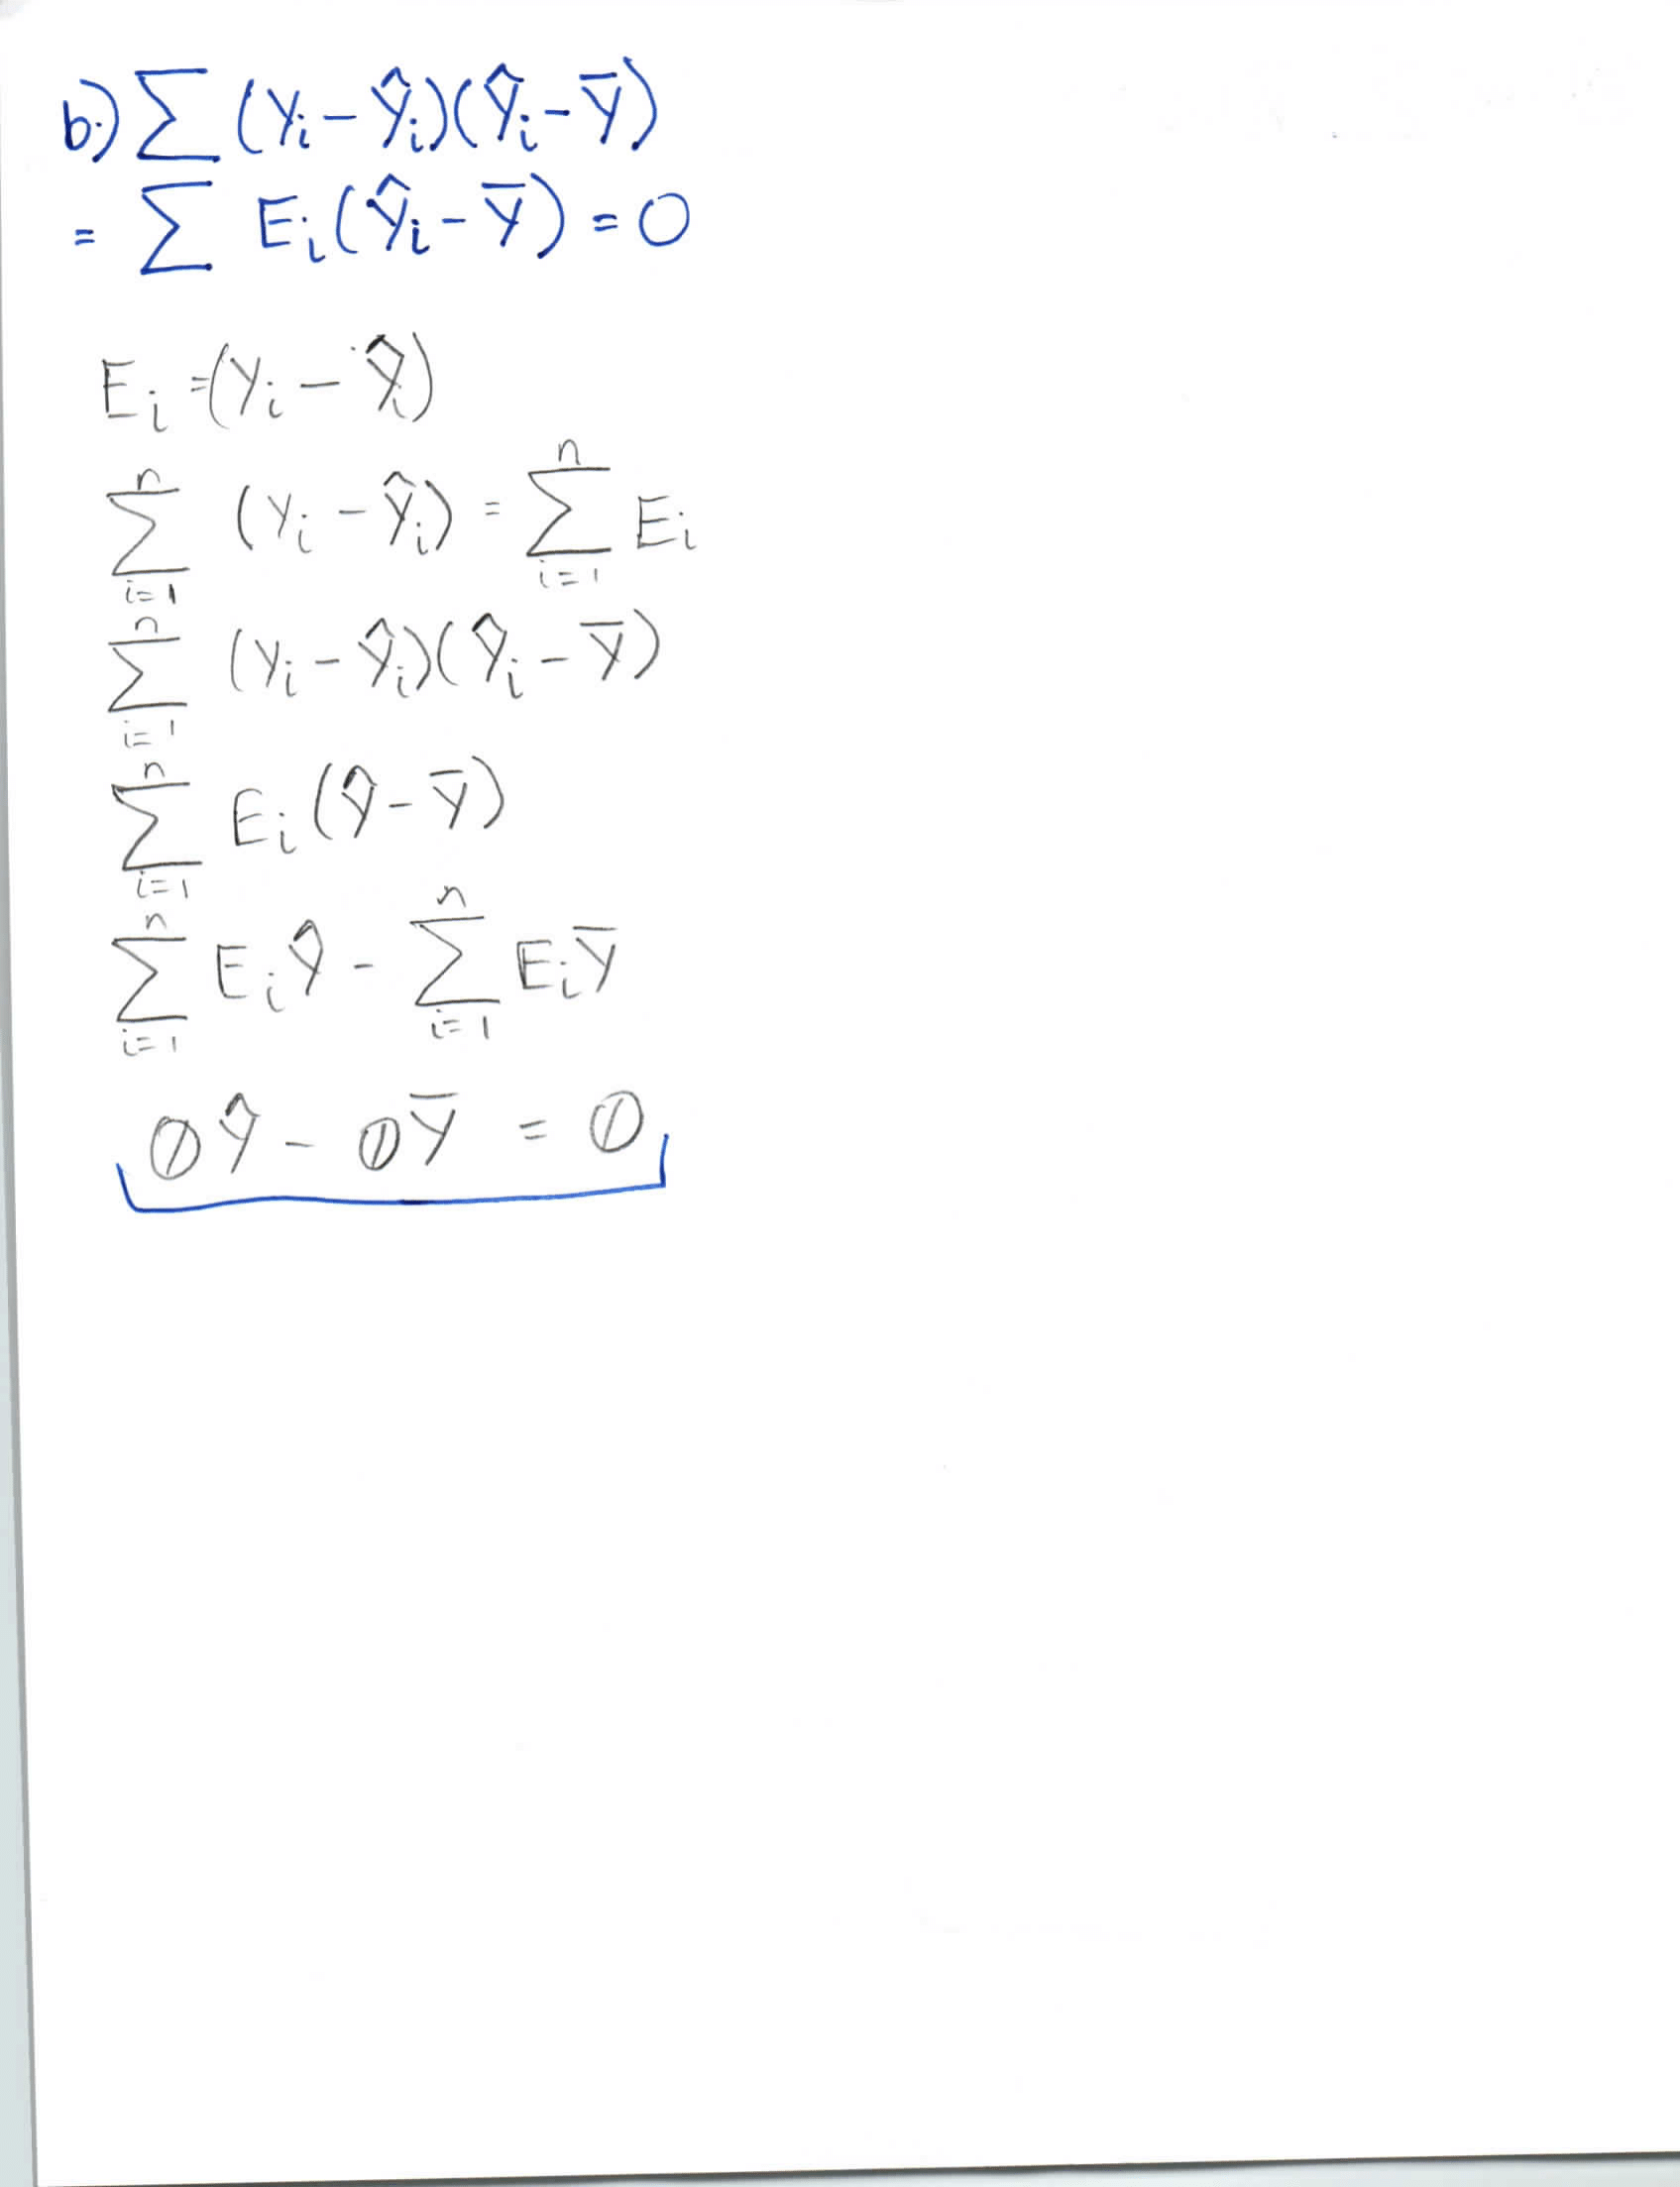

In [3]:
Image("hw2_5.1-2.png",width=500, height=650)

# A.

In [4]:
'''The data I will be using for this assignment is a selection of Fridays from 2021, my day off, where I typically
leave home and try to walk alot. The average daily temperature of the selected Friday is in the first column and 
my recorded number of steps from Fitbit. I want to establish the relationship (if any) between the temperature and
the number of steps taken'''

data = pd.read_excel('steps.xlsx')
data

,Average Daily Temp,Steps
0,74.0,12868
1,75.0,14383
2,71.0,15383
3,70.0,14948
4,69.0,14039
5,68.5,12020
6,68.0,10939
7,67.0,14756
8,66.5,13399
9,66.0,12958


In [5]:
data1 = data.to_numpy()
data1

array([[   74. , 12868. ],
       [   75. , 14383. ],
       [   71. , 15383. ],
       [   70. , 14948. ],
       [   69. , 14039. ],
       [   68.5, 12020. ],
       [   68. , 10939. ],
       [   67. , 14756. ],
       [   66.5, 13399. ],
       [   66. , 12958. ],
       [   65. ,  9587. ],
       [   63.5, 13448. ],
       [   61. ,  9863. ],
       [   60. , 11345. ],
       [   59.5, 10304. ]])

In [6]:
x = data1[:,0] #independent variable
y = data1[:,1] #dependent variable
N = len(x) #number of observations

In [7]:
x #average temperature

array([74. , 75. , 71. , 70. , 69. , 68.5, 68. , 67. , 66.5, 66. , 65. ,
       63.5, 61. , 60. , 59.5])

In [8]:
x.mean()

66.93333333333334

In [9]:
y #number of steps

array([12868., 14383., 15383., 14948., 14039., 12020., 10939., 14756.,
       13399., 12958.,  9587., 13448.,  9863., 11345., 10304.])

In [10]:
np.mean(y)

12682.666666666666

In [11]:
#Define Mathematical Variables Required 
ym = y - np.mean(y)
xm = x - np.mean(x)
beta = sum((x - xm)*(y-ym)) /(sum((x-xm)**2))
alpha = np.mean(y) - beta*np.mean(x)
yhat = alpha + beta*x
SSE = np.sum((yhat- ym)**2)
eps = y - yhat
TSS = ((y-y.mean())**2).sum()
RSS = ((y-yhat)**2).sum()
RegSS = TSS - RSS
R2 = RegSS / TSS
corr = (xm*ym).sum() / np.sqrt((xm**2).sum()*(ym**2).sum())

# B.

In [13]:
#Loss function we must minimize
def lossfunc(x,y,alpha,beta):
    return sum((y - alpha - beta*x)**2)

# C.

In [14]:
#Equations that minimize the Error function are defined as
beta = sum((x - xm)*(y-ym)) /(sum((x-xm)**2))
alpha = np.mean(y) - beta*np.mean(x)

# D.

In [15]:
print('The numeric values that minimizes A is {} for this data'.format(alpha)) 
print('The numeric values that minimizes B is {} for this data'.format(beta))

The numeric values that minimizes A is -5.4569682106375694e-12 for this data
The numeric values that minimizes B is 189.48207171314746 for this data


# E.

In [16]:
print('The SSE for this data is {}'.format(SSE))
print('The TSS for this data is {}'.format(TSS))
print('The RegSS for this data is {}'.format(RegSS))
print('The R^2 for this data is {}'.format(R2))
print('The Correlation betwen x and y for this data is {}'.format(corr))

The SSE for this data is 2444667908.377305
The TSS for this data is 51122625.33333333
The RegSS for this data is 19205223.62269381
The R^2 for this data is 0.3756697449998032
The Correlation betwen x and y for this data is 0.6375654544367881


# F.

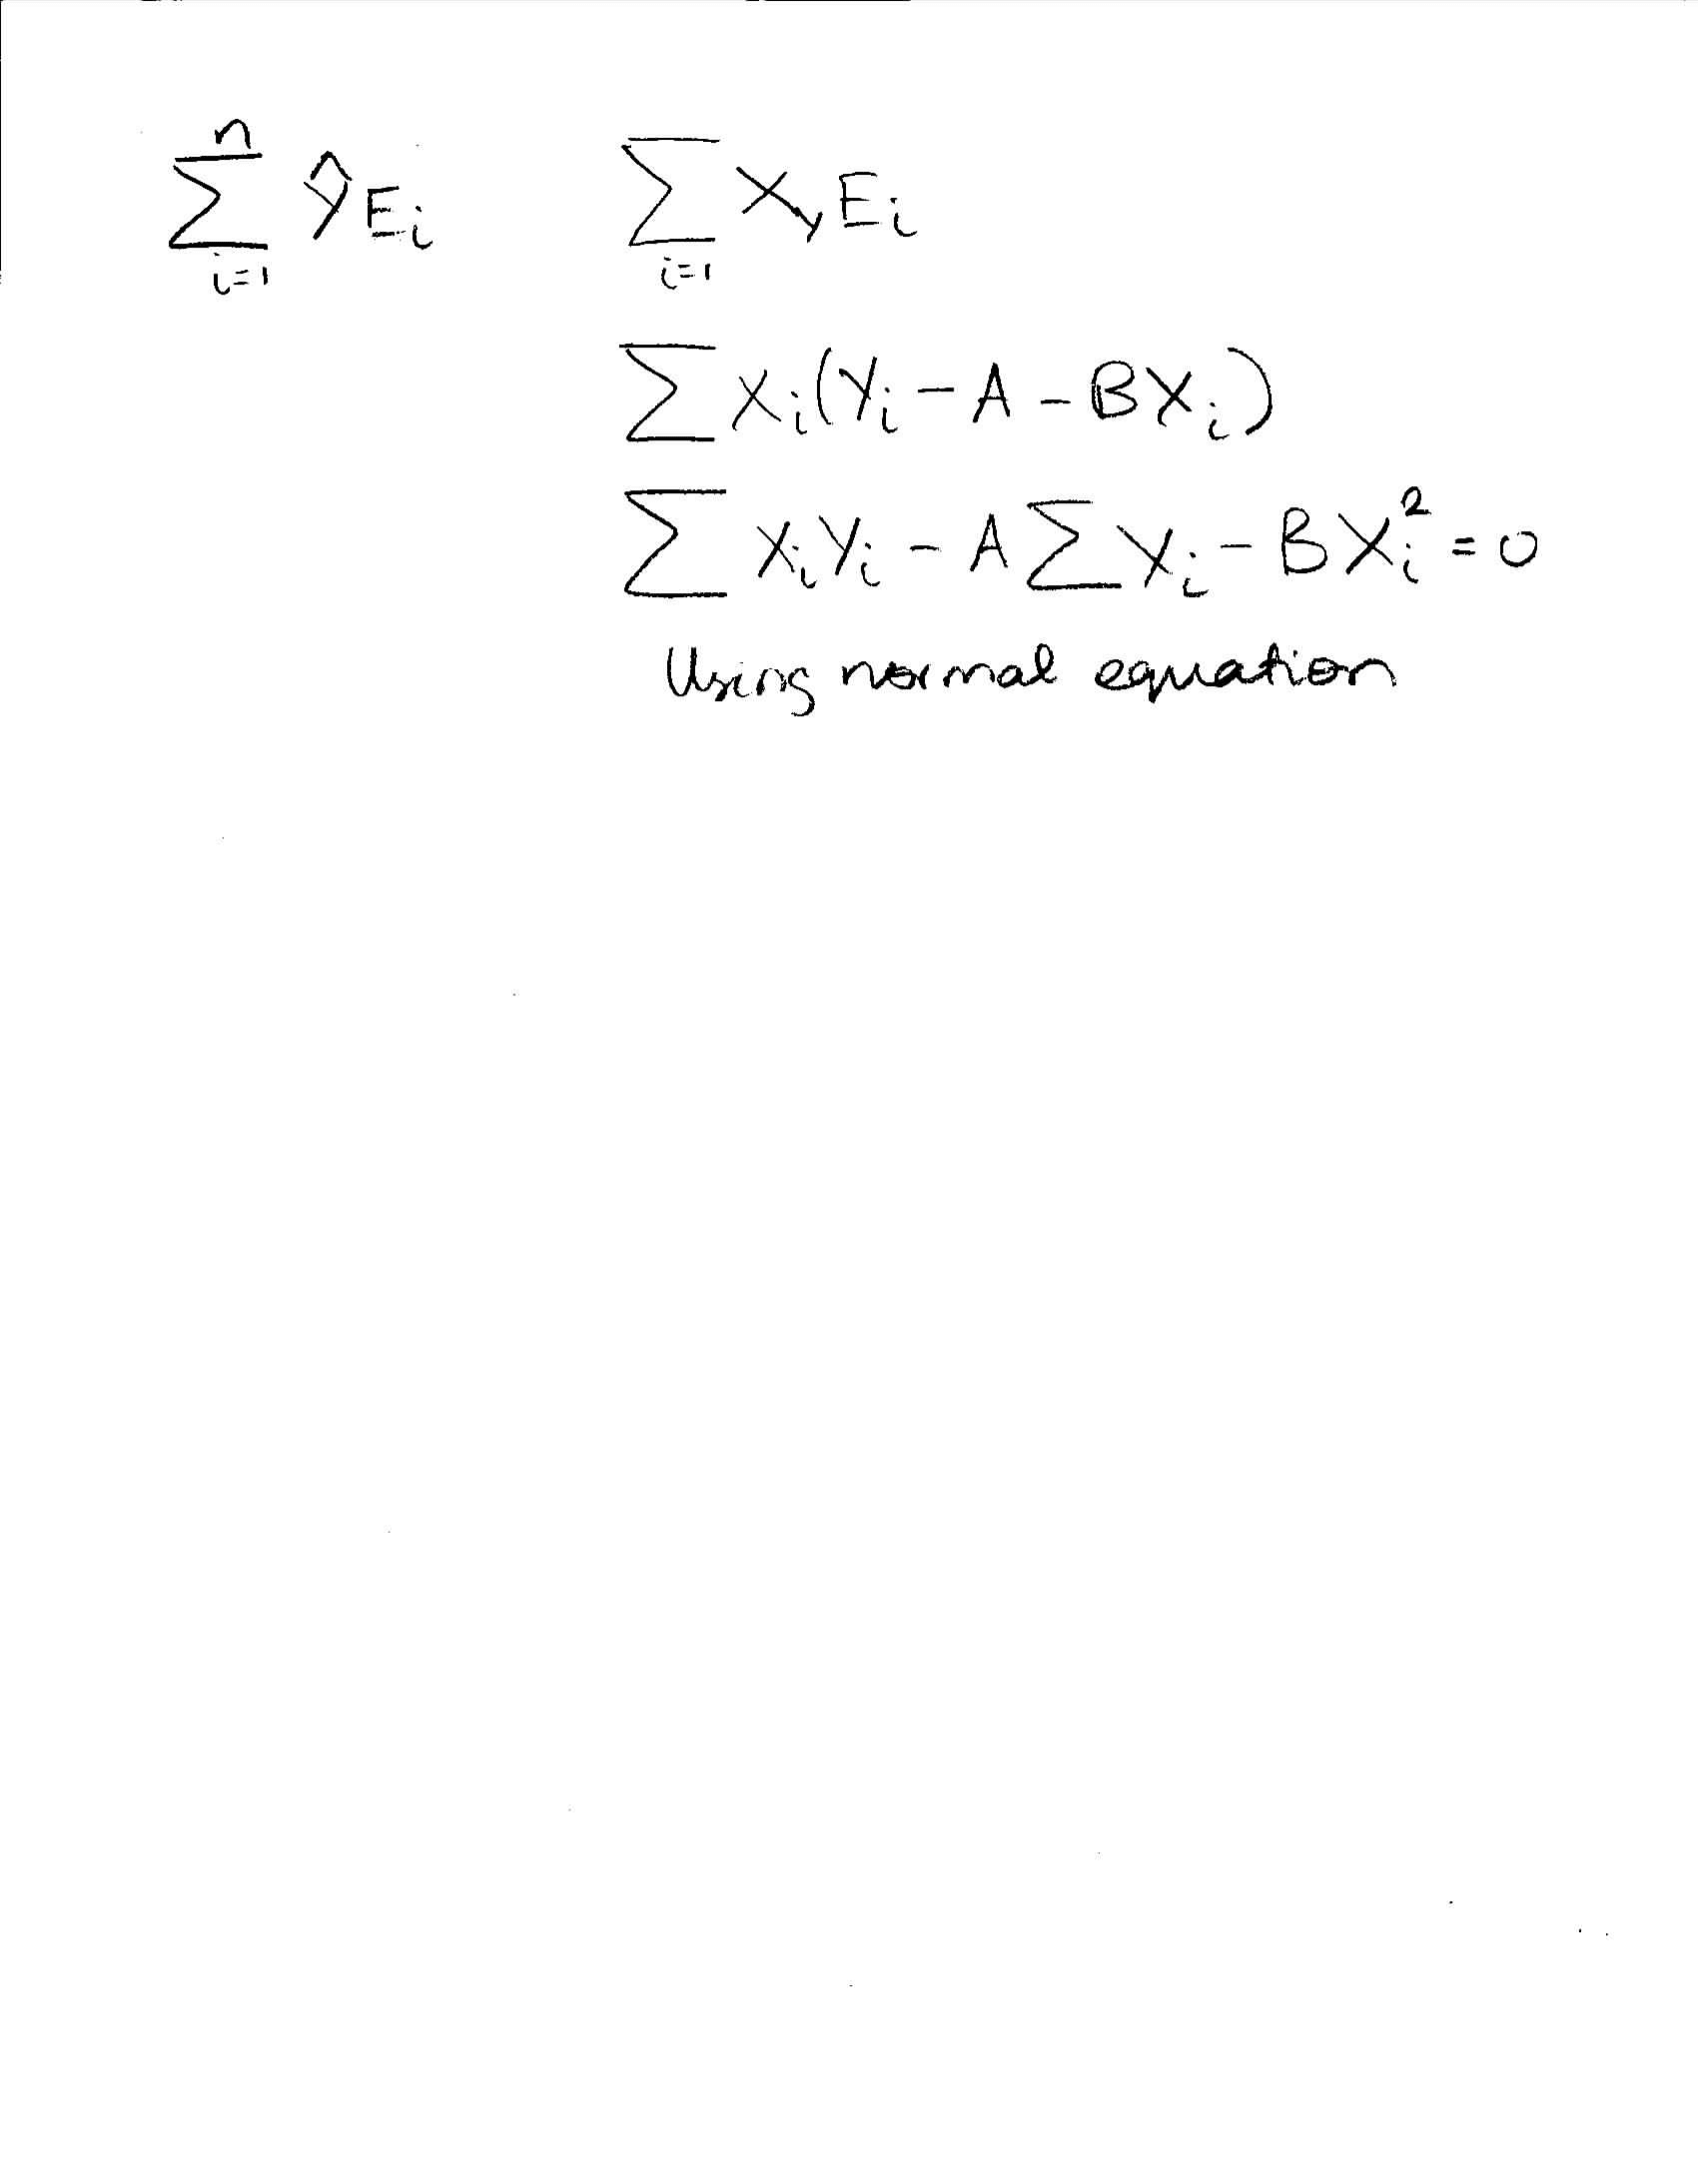

In [20]:
Image("f.png",width=400, height=500)

In [22]:
'''We will no verify that the least square line through point in X_mean and Y_mean'''

print("Predicted value = ", alpha+ beta*np.mean(x))
print("Y_mean= ", np.mean(y))

Predicted value =  12682.666666666666
Y_mean=  12682.666666666666


# G.

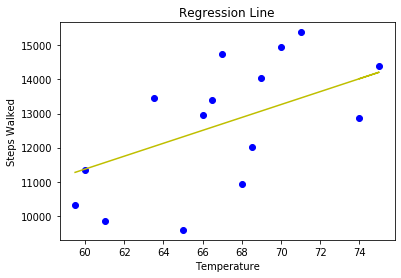

In [17]:
#Plot the model and the corresponding Regression line
plt.title('Regression Line')
plt.xlabel('Temperature')
plt.ylabel('Steps Walked')
plt.scatter(x,y, c='b', marker='o')  
plt.plot(x, yhat,'y-')
plt.show()

As we can see there seems to be a slight positive increase in the number of steps and the higher temperatures. However, the SSE is relatively large and teh R^2 is pretty awful. So in reality, we can't say for certain that the higher the temperature the more steps I will walk. If we were to gather for example daily data for a year perhaps we can make more definitive statement. However, this graph of 15 observations seems more similar to a cluster than to a positive relationship. I would not use a prediction from this model, I would however make more use of such a model with many more data points. 